In [1]:
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML

from tqdm import tqdm

In [2]:
M1 = np.zeros((4,4))
M2 = np.ones((4,4))

100%|██████████| 10/10 [00:00<00:00, 737.47it/s]


Text(-19.0, 0, 'Row 1')

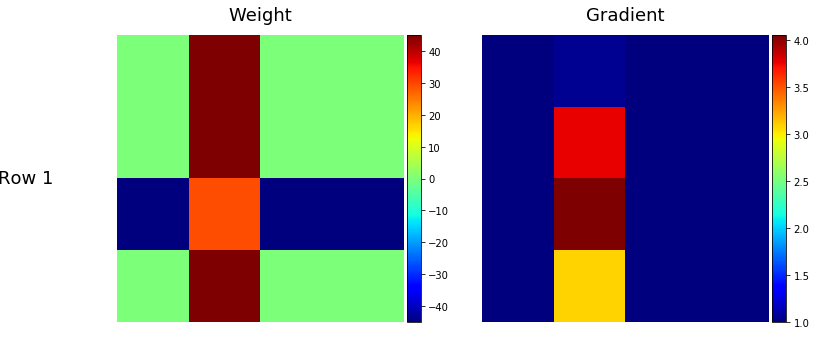

In [3]:
fig, ax = plt.subplots(1,2, figsize=(12,8))
ims = []

for e in tqdm(range(10)):
    M1[:,1] += e
    M1[2,:] -= e
    M1[2,1] += 10/(e+1)
    
    M2[:,1] += np.random.randn(4)
    im1 = ax[0].imshow(M1, cmap='jet', vmax=50, vmin=-50)
    im2 = ax[1].imshow(M2, cmap='jet', vmax=5, vmin=-5)

    ims.append([im1,im2])
divider1 = make_axes_locatable(ax[0])
divider2 = make_axes_locatable(ax[1])
cax1 = divider1.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05) 
fig.colorbar(im1, ax=ax[0], cax=cax1)
fig.colorbar(im2, ax=ax[1], cax=cax2)          
    
ax[0].axis('off')
ax[1].axis('off')

    

pad = 15
# Annotating columns
ax[0].annotate('Weight', xy=(0.5,1), xytext=(0,pad),
               xycoords='axes fraction', textcoords='offset points',
               size='large', ha='center', va='baseline', fontsize=18)

ax[1].annotate('Gradient', xy=(0.5,1), xytext=(0,pad),
               xycoords='axes fraction', textcoords='offset points',
               size='large', ha='center', va='baseline', fontsize=18)
     
# Annotating rows

row = 'Row 1'
ax[0].annotate(row, xy=(0,0.5), xytext=(-ax[0].yaxis.labelpad - pad,0),
                  xycoords=ax[0].yaxis.label, textcoords='offset points',
                  size='large', ha='right', va='center', fontsize=18)

In [4]:
ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True,
                                repeat_delay=1000)

In [5]:
ani.save('wrongcolor.gif', dpi=80, writer='imagemagick')
# HTML(ani.to_html5_video())